<a href="https://colab.research.google.com/github/pohelwon/backend_test_homework/blob/master/segmentation_fitness_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

!pip install -q gdown
import gdown

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

In [ ]:
# ниже по ссылке - наш датасет
url = "https://drive.google.com/uc?id=16EpQJt_zR1seKSdznWud4X-_NTAmNZyo"
output = "fitness_segments_synthetic.csv"

gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=16EpQJt_zR1seKSdznWud4X-_NTAmNZyo
To: /content/fitness_segments_synthetic.csv
100%|██████████| 97.5k/97.5k [00:00<00:00, 18.7MB/s]


In [ ]:
df

,customer_id,months_since_signup,app_opens_30d,active_days_30d,workouts_logged_30d,avg_workout_minutes_30d,streak_longest_days,features_strength_used_30d,features_cardio_used_30d,features_yoga_used_30d,...,satisfaction_score_1_10,age,country,signup_channel,plan_type,revenue_90d,total_revenue_lifetime,discounts_used_lifetime,treatment_exposed,converted_to_premium_14d
0,C00001,13,3,1,0,7,2,1,1,1,...,5,46,IN,Paid,Free,1.59,8.01,0,1,0
1,C00002,10,40,17,10,33,24,5,6,3,...,9,40,BR,Referral,Premium,23.51,82.21,1,0,0
2,C00003,15,83,24,42,26,67,17,12,5,...,10,40,IN,Organic,Free,6.18,34.54,1,0,0
3,C00004,9,31,5,5,20,8,3,4,2,...,6,39,Other,Organic,Free,9.11,37.53,1,0,0
4,C00005,17,91,27,35,41,47,15,15,4,...,9,35,Other,Social,Basic,30.12,200.86,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,C01196,11,3,2,1,15,3,1,0,1,...,4,37,US,Paid,Free,9.31,39.80,0,1,0
1196,C01197,16,4,2,1,14,2,0,1,0,...,5,38,Other,Social,Free,4.98,23.60,0,1,0
1197,C01198,18,1,2,1,16,2,0,0,0,...,4,27,Other,Social,Free,1.80,8.97,1,1,0
1198,C01199,11,30,15,17,31,17,5,5,3,...,8,29,UK,Organic,Free,8.66,32.08,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   1200 non-null   object 
 1   months_since_signup           1200 non-null   int64  
 2   app_opens_30d                 1200 non-null   int64  
 3   active_days_30d               1200 non-null   int64  
 4   workouts_logged_30d           1200 non-null   int64  
 5   avg_workout_minutes_30d       1200 non-null   int64  
 6   streak_longest_days           1200 non-null   int64  
 7   features_strength_used_30d    1200 non-null   int64  
 8   features_cardio_used_30d      1200 non-null   int64  
 9   features_yoga_used_30d        1200 non-null   int64  
 10  features_meditation_used_30d  1200 non-null   int64  
 11  social_follows                1200 non-null   int64  
 12  social_posts_30d              1200 non-null   int64  
 13  cha

In [ ]:
df.describe()

,months_since_signup,app_opens_30d,active_days_30d,workouts_logged_30d,avg_workout_minutes_30d,streak_longest_days,features_strength_used_30d,features_cardio_used_30d,features_yoga_used_30d,features_meditation_used_30d,...,social_posts_30d,challenges_joined_90d,goal_progress_percent,satisfaction_score_1_10,age,revenue_90d,total_revenue_lifetime,discounts_used_lifetime,treatment_exposed,converted_to_premium_14d
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,10.374167,33.584167,11.650833,12.180000,24.364167,16.540833,4.433333,4.418333,2.280000,2.197500,...,5.105000,2.634167,45.662500,7.004167,33.889167,17.691392,79.246025,0.794167,0.505000,0.161667
std,5.475322,27.565851,8.297366,12.938139,11.800746,20.945738,4.583273,4.462614,1.855479,1.896442,...,6.362996,2.411468,26.924296,1.858412,5.390525,21.609615,119.250026,0.822007,0.500183,0.368298
min,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2.000000,20.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,7.000000,14.000000,6.000000,3.000000,16.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,22.000000,6.000000,30.000000,3.935000,8.040000,0.000000,0.000000,0.000000
50%,11.000000,30.000000,10.000000,6.000000,20.000000,6.000000,3.000000,3.000000,2.000000,1.000000,...,1.000000,1.000000,39.000000,7.000000,34.000000,7.965000,26.245000,1.000000,1.000000,0.000000
75%,14.000000,43.000000,18.000000,18.000000,33.000000,21.000000,6.000000,5.000000,3.000000,3.000000,...,9.000000,5.000000,73.000000,9.000000,37.000000,25.192500,94.015000,1.000000,1.000000,0.000000
max,24.000000,120.000000,29.000000,48.000000,57.000000,85.000000,20.000000,18.000000,10.000000,10.000000,...,27.000000,9.000000,99.000000,10.000000,53.000000,89.460000,685.430000,3.000000,1.000000,1.000000


In [ ]:
# проверка пропущенных величин (в этом датасете их нет, но вдруг)
df.isna().sum()

,0
customer_id,0
months_since_signup,0
app_opens_30d,0
active_days_30d,0
workouts_logged_30d,0
avg_workout_minutes_30d,0
streak_longest_days,0
features_strength_used_30d,0
features_cardio_used_30d,0
features_yoga_used_30d,0


In [ ]:
# переменные, в пространстве которых строим кластеры
# нужно выбрать и заполнить в соответствии с целью (формат - как ниже)
feature_cols = [
    "active_days_30d",
]

X = df[feature_cols].copy()

In [ ]:
# нормализация величин по стандартным отклонениям
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

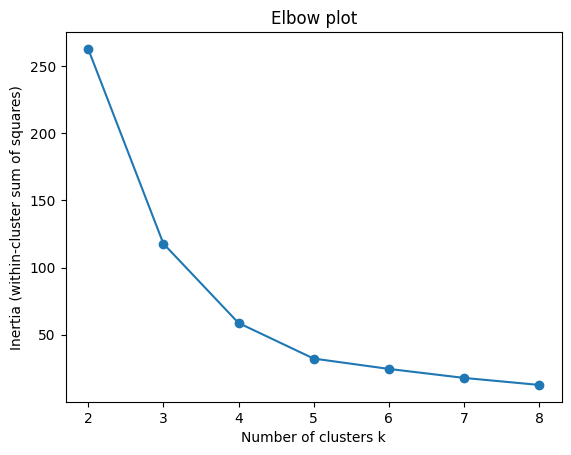

In [ ]:
# @title
# изменение вариативности внутри кластеров в зависимости от их количества
inertias = []
possible_k = range(2, 9)

for k in possible_k:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(possible_k, inertias, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (within-cluster sum of squares)")
plt.title("Elbow plot")
plt.show()

In [ ]:
# определение кластеров, метод k-means
k = 2  # число кластеров - нужно подобрать подходящее
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

In [ ]:
df["cluster"].value_counts().sort_index()

,count
cluster,
0,389
1,811


In [ ]:
# уменьшаем измерения до двух для визуализации
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df["pc1"] = X_pca[:, 0]
df["pc2"] = X_pca[:, 1]

print("Explained variance by PC1 and PC2:",
      pca.explained_variance_ratio_)

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='covariance_eigh'

In [ ]:
# визуализация кластеров
plt.figure(figsize=(8, 6))

for cluster_id in sorted(df["cluster"].unique()):
    subset = df[df["cluster"] == cluster_id]
    plt.scatter(subset["pc1"], subset["pc2"], label=f"Cluster {cluster_id}", alpha=0.6)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters in PCA space (2 components)")
plt.legend()
plt.show()

In [ ]:
# профили кластеров по выбранным переменным (средние значения)
cluster_profile = df.groupby("cluster")[feature_cols].mean().round(1)
cluster_profile

In [ ]:
cluster_context = df.groupby("cluster")[["age"]].mean().round(1)
cluster_context["share_premium"] = (
    (df["plan_type"] == "Premium")
    .groupby(df["cluster"])
    .mean()
    .round(2)
)
cluster_context["share_free"] = (
    (df["plan_type"] == "Free")
    .groupby(df["cluster"])
    .mean()
    .round(2)
)
cluster_context

In [ ]:
pd.crosstab(df["cluster"], df["signup_channel"], normalize="index").round(2)

In [ ]:
df[["treatment_exposed", "converted_to_premium_14d"]].head()

In [ ]:
def conversion_rate(group):
    return group["converted_to_premium_14d"].mean()

results = []

for cluster_id, group in df.groupby("cluster"):
    treat = group[group["treatment_exposed"] == 1]
    control = group[group["treatment_exposed"] == 0]

    conv_treat = conversion_rate(treat)
    conv_control = conversion_rate(control)
    uplift = conv_treat - conv_control

    results.append({
        "cluster": cluster_id,
        "conv_control": round(conv_control, 3),
        "conv_treat": round(conv_treat, 3),
        "uplift": round(uplift, 3),
        "n_control": len(control),
        "n_treat": len(treat),
    })

uplift_df = pd.DataFrame(results).sort_values("cluster")
uplift_df